Agora realizaremos o calcula para encontrar a fronteira eficiente de Markowitz

Vamos utilizar a base de dados abaixo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Ativos financeiros que você deseja baixar
assets = ['PG', '^GSPC']

# DataFrame para armazenar os dados
pf_data = pd.DataFrame()

# Baixando os dados para cada ativo
for a in assets:
    pf_data[a] = yf.download(a, start='2010-01-01')['Close']  # Corrigido para usar 'start' em vez de 'stats'

# Exibindo as primeiras linhas dos dados baixados
print(pf_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   PG        ^GSPC
Date                              
2010-01-04  39.432007  1132.989990
2010-01-05  39.444916  1136.520020
2010-01-06  39.257801  1137.140015
2010-01-07  39.044922  1141.689941
2010-01-08  38.993294  1144.979980


<Axes: xlabel='Date'>

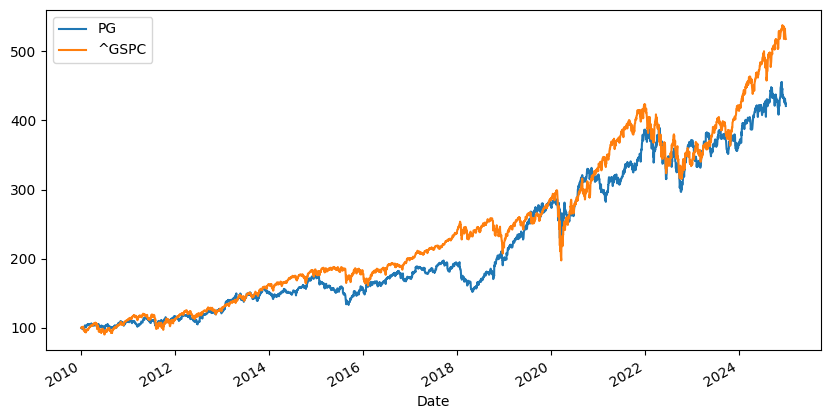

In [2]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [3]:
log_return = np.log(pf_data / pf_data.shift(1))

Media anual do log 

In [4]:
log_return.mean() *250

PG       0.095210
^GSPC    0.108953
dtype: float64

In [5]:
log_return.cov() * 250

,PG,^GSPC
PG,0.028940,0.015756
^GSPC,0.015756,0.029633


In [6]:
log_return.corr()

,PG,^GSPC
PG,1.000000,0.538024
^GSPC,0.538024,1.000000


In [7]:
num_assets = len(assets)
num_assets

2

O metodo abaixo cria dois pesos aleatorios

In [8]:
arr = np.random.random(2)
arr

array([0.46091936, 0.41623077])

In [9]:
arr[0] + arr[1]

0.8771501308437072

Solução para realizar o loop parar faze ambos serem iguais a 1. 

In [10]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.88759274, 0.11240726])

In [11]:
weights[0] + weights[1]

1.0

Formula para o retorno esperado do portfilio.

In [12]:
np.sum(weights * log_return.mean()) *250

0.09675471732477499

Agora calcular a expectatica variancia.

In [13]:
np.dot(weights.T, np.dot(log_return.cov() *250, weights))

0.02631790886716952

Expectativa de volatividade do portifolio

In [14]:
np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights)))

0.16222795340868207

Realizar um loop que se repeti 1000 meses

In [15]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights *log_return.mean()) * 250 )
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10445467298984523,
  0.09825932838392021,
  0.10347289754754509,
  0.10495284763989032,
  0.10841171788354442,
  0.09944054043588983,
  0.10155287230577499,
  0.09882811221003888,
  0.10128977344221796,
  0.0976024642609485,
  0.09701308723907004,
  0.10364271524660706,
  0.10287902476805162,
  0.09781934699066881,
  0.10164896534245678,
  0.09869070714112238,
  0.10580222748330344,
  0.1043841581850087,
  0.10705937647594999,
  0.1029866036896053,
  0.10449770247604952,
  0.10640366207009666,
  0.09925350168029592,
  0.1066778238098128,
  0.09949698309509429,
  0.1008138699325388,
  0.10698408246449535,
  0.09880085020182912,
  0.10303245803840477,
  0.09984343308892187,
  0.09696277617566314,
  0.09651789157492995,
  0.10561653100471807,
  0.10220790990038726,
  0.10066406100496957,
  0.10192499227970865,
  0.09530002936115617,
  0.10303958347415483,
  0.10238525642554354,
  0.10328671261692776,
  0.1001518262084919,
  0.1013026585405335,
  0.09903778082033345,
  0.10021971315778

Abaixo podemos converter o codigo acima em arrays

In [16]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights *log_return.mean()) * 250 )
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities

(array([0.10148996, 0.10498435, 0.10315679, 0.10472896, 0.1044974 ,
        0.10519764, 0.10368432, 0.10451483, 0.10629572, 0.09788261,
        0.10534025, 0.10058769, 0.10328794, 0.09810742, 0.10516137,
        0.09923088, 0.10279414, 0.09911284, 0.10202669, 0.10150151,
        0.10411927, 0.10174984, 0.0970617 , 0.10045029, 0.09674438,
        0.10083803, 0.10575671, 0.10739335, 0.10297859, 0.09561064,
        0.10731777, 0.10845995, 0.10262974, 0.10537308, 0.10396385,
        0.10385866, 0.10200056, 0.10294861, 0.09906888, 0.09727887,
        0.10216372, 0.10050515, 0.09551388, 0.09916964, 0.10335541,
        0.10826203, 0.10489318, 0.09599962, 0.09573335, 0.10497738,
        0.10552093, 0.10355609, 0.10572528, 0.10170955, 0.10309615,
        0.10157638, 0.09876312, 0.10105429, 0.10240557, 0.09583833,
        0.10774867, 0.10034076, 0.10347725, 0.1052292 , 0.10073868,
        0.1020689 , 0.10142116, 0.10626864, 0.10215218, 0.09962466,
        0.09665366, 0.10273652, 0.10222785, 0.10

Agora vamos plotar o resultado em um grafico

Precisamos aplicar esta correção antes de plotar os dados

In [17]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [18]:
portfolios.head()

,Return,Volatility
0,0.101490,0.150138
1,0.104984,0.154515
2,0.103157,0.150801
3,0.104729,0.153815
4,0.104497,0.153230


In [19]:
portfolios.tail()

,Return,Volatility
995,0.101531,0.150122
996,0.103516,0.151289
997,0.106909,0.161569
998,0.096726,0.162359
999,0.102987,0.150613


Agora vamos plotar os graficos

Fronteira eficiente.

Text(0, 0.5, 'Expected Return')

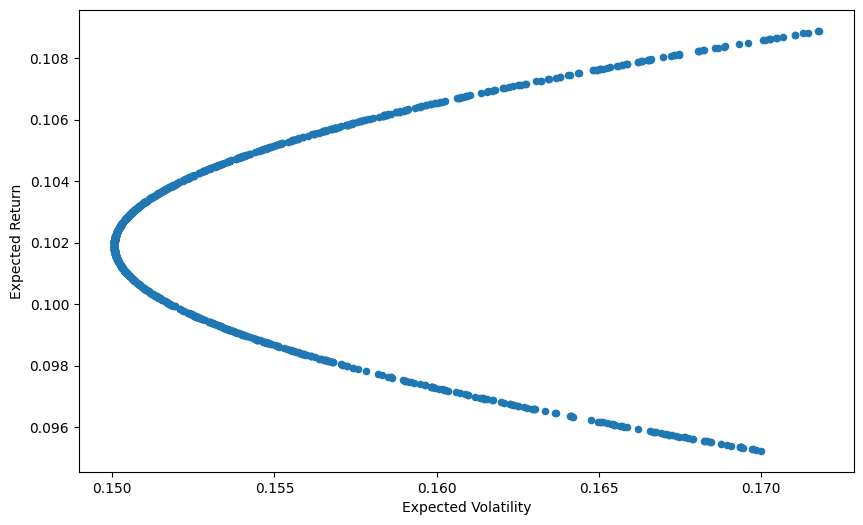

In [21]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')